# Descubra quem fez o ENEM 2016 apenas para treino

Neste desafio deverá descobrir quais estudantes estão fazendo a prova apenas para treino.

## Tópicos

Neste desafio você aprenderá:

- Python
- Pandas
- Sklearn
- Regression
- Classification

## Requisitos

Você precisará de python 3.6 (ou superior) e do gerenciador de pacotes pip.

Para instalar os requisitos, execute o comando como no exemplo abaixo:

    pip install -r requirements.txt

## Detalhes

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

Alguns estudantes decidem realizar prova do ENEM de forma precoce, como um teste (coluna IN_TREINEIRO). Neste desafio, você deve criar um modelo de classificação binária para inferir a mesma. Os resultados possíveis da sua resposta devem ser “0” ou “1”.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: `NU_INSCRICAO` e `IN_TREINEIRO`.

# Imports

In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.neural_network import MLPClassifier

pd.set_option("display.max_columns", 1000)

# Verificar se as colunas são iguais para os dados de treino e teste


Algo que pode afetar o treinamento do modelo é o aprendizado com variáveis que não serão usadas de fato, por isso é importante verificar quais constam no dataset de teste.

In [210]:
dados = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

print(f'Treino: {dados.shape}\nTeste: {teste.shape}')

Treino: (13730, 167)
Teste: (4570, 43)


In [211]:
list(dados.columns)

['Unnamed: 0',
 'NU_INSCRICAO',
 'NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR

In [212]:
list(teste.columns)

['NU_INSCRICAO',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'TP_DEPENDENCIA_ADM_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047']

</br>

 Algo que podemos perceber antes de começar as análises é a discrepância entre a quantidade de colunas em cada um dos datasets.  
 Como o desafio nos pede para criar um modelo de previsão, podemos retirar as colunas que não estão presentes no conjunto de teste, poupando tempo de análise e evitando que o modelo aprenda comportamentos que não farão parte dos testes.

---

In [213]:
# Colunas presentes nos dois conjuntos
labels = [i for i in dados.columns if i in teste.columns]
print(f'Total de colunas: {len(labels)}\n\nColunas selecionadas:\n{labels}')

Total de colunas: 43

Colunas selecionadas:
['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']


In [214]:
# Colunas presentes apenas no conjunto de treino
labels_inexistentes_teste = [i for i in dados.columns if i not in teste.columns]
print(f'Total de colunas retiradas: {len(labels_inexistentes_teste)}\n\nColunas retiradas:\n{labels_inexistentes_teste}')

Total de colunas retiradas: 124

Colunas retiradas:
['Unnamed: 0', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'TP_ESTADO_CIVIL', 'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_LACTANTE', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18', 'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS', 'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS', 'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE', 'IN_MACA', 'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO', 'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO', 'IN_LAMINA_OVERLAY', 'I

</br ></br >

# Dicionário de dados


Coluna | Descrição | DETALHAMENTO DOS ITENS
------ | ----------|-------
NU_INSCRICAO|Número de inscrição|
CO_UF_RESIDENCIA'|Código da Unidade da Federação de residência|
SG_UF_RESIDENCIA'|Sigla da Unidade da Federação de residência|
NU_IDADE|Idade|
TP_SEXO|Sexo| M: Masculino, F: feminino
TP_COR_RACA|Cor/raça|0	Não declarado - 1 Branca - 2	 Preta - 3 Parda  - 4 Amarela   - 5	Indígena  - 6	Não dispõe da informação
TP_NACIONALIDADE|Nacionalidade|0 Não informado - 1 Brasileiro(a) - 2 Brasileiro(a) Naturalizado(a) - 3 Estrangeiro(a) - 4 Brasileiro(a) Nato(a), nascido(a) noexterior|
TP_ST_CONCLUSAO'|Situação de conclusão do Ensino Médio|1 Já concluí o Ensino Médio - 2 Estou cursando e concluirei o Ensino Médio em 2016 - 3 Estou cursando e concluirei o Ensino Médio após 2016 - 4 Não concluí e não estou cursando o Ensino Médio|
TP_ANO_CONCLUIU|Ano de conclusão do ensino médio|0 Não informado - 1 2015 -  2 2014 -  3 2013 - 4 2012 - 5 2011 - 6 2010 - 7 2009 - 8 2008 - 9 2007 - 10 Anterior a 2007|
TP_ESCOLA|Tipo de escola do Ensino Médio|1 Não Respondeu - 2 Pública - 3 Privada - 4 Exterior|
TP_ENSINO|Tipo de instituição que concluiu ou concluirá o Ensino Médio |1 Ensino Regular - 2 Educação Especial - Modalidade Substitutiva - 3 Educação de Jovens e Adultos|
TP_DEPENDENCIA_ADM_ESC|Dependência administrativa (Escola)|1 Federal - 2 Estadual - 3 Municipal - 4 Privada|
IN_BAIXA_VISAO|Indicador de baixa visão|1 Sim - 0 Não|
IN_CEGUEIRA|Indicador de cegueira|1 Sim - 0 Não|
IN_SURDEZ|Indicador de surdez|1 Sim - 0 Não|
IN_DISLEXIA|Indicador de dislexia|1 Sim - 0 Não|
IN_DISCALCULIA|Indicador de discalculia|1 Sim - 0 Não|
IN_SABATISTA|Indicador de solicitação de prova aplicada em horário diferenciado para os guardadores dos sábados||
IN_GESTANTE|Indicador de gestante|1 Sim - 0 Não|
IN_IDOSO|Indicador de inscrito idoso|1 Sim - 0 Não|
TP_PRESENCA_CN|Presença na prova objetiva de Ciências da Natureza|0 Faltou à prova - 1 Presente na prova - 2 Eliminado na prova|
TP_PRESENCA_CH|Presença na prova objetiva de Ciências Humanas|0 Faltou à prova - 1 Presente na prova - 2 Eliminado na prova|
TP_PRESENCA_LC|Presença na prova objetiva de Linguagens e códigos|0 Faltou à prova - 1 Presente na prova - 2 Eliminado na prova|
TP_PRESENCA_MT|Presença na prova objetiva de Matemática|0 Faltou à prova - 1 Presente na prova - 2 Eliminado na prova|
NU_NOTA_CN|Nota da prova de Ciências da Natureza||
NU_NOTA_CH|Nota da prova de Ciências da Humanas||
NU_NOTA_LC|Nota da prova de Linguagens e Códigos||
TP_LINGUA|Lingua estrangeira|0 Ingles - 1 Espanhol|
TP_STATUS_REDACAO|Situação da redação do participante|1 Sem problemas - 2 Anulada - 3 Cópia Texto Motivador - 4 Em Branco - 5 Fere Direitos Humanos - 6 Fuga ao tema - 7 Não atendimento ao tipo - 8 Texto insuficiente - 9 Parte desconectada|
NU_NOTA_COMP1|Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.||
NU_NOTA_COMP2|Nota da competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.||
NU_NOTA_COMP3|Nota da competência 3 - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.||
NU_NOTA_COMP4|Nota da competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.||
NU_NOTA_COMP5|Nota da competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos.||
NU_NOTA_REDACAO|Nota da prova de redação||
Q001|Até que série seu pai, ou o homem responsável por você, estudou?|A Nunca estudou. - B Não completou a 4ª série/5º ano do Ensino Fundamental. - C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental. - D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio. - E Completou o Ensino Médio, mas não completou a Faculdade. - F Completou a Faculdade, mas não completou a Pós-graduação. - G Completou a Pós-graduação. - H Não sei.|
Q002|Até que série sua mãe, ou a mulher responsável por você, estudou?|A Nunca estudou. - B Não completou a 4ª série/5º ano do Ensino Fundamental. - C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental. - D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio. - E Completou o Ensino Médio, mas não completou a Faculdade. - F Completou a Faculdade, mas não completou a Pós-graduação. - G Completou a Pós-graduação. - H Não sei.|
Q006|Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)|``A Nenhuma renda. - B Até R$ 880,00 C De R$ 880,01 até R$ 1.320,00. - D De R$ 1.320,01 até R$ 1.760,00. - E De R$ 1.760,01 até R$ 2.200,00. - F De R$ 2.200,01 até R$ 2.640,00. - G De R$ 2.640,01 até R$ 3.520,00. - H De R$ 3.520,01 até R$ 4.400,00. - I De R$ 4.400,01 até R$ 5.280,00. - J De R$ 5.280,01 até R$ 6.160,00. - K De R$$ 6.160,01 até R$ 7.040,00. - L De R$ 7.040,01 até R$ 7.920,00. - M De R$ 7.920,01 até R$ 8.800,00. - N De R$ 8.800,01 até R$ 10.560,00. - O De R$ 10.560,01 até R$ 13.200,00. - P De R$ 13.200,01 até R$ 17.600,00. - Q Mais de R$ 17.600,00.``|
Q024|Na sua residência tem computador?|A Não. - B Sim, um. - C Sim, dois. - D Sim, três. - E Sim, quatro ou mais.|
Q025|Na sua residência tem acesso à Internet?|A Não - B Sim|
Q026|Você exerce ou já exerceu atividade remunerada?|A Não, nunca trabalhei. - B Sim, já trabalhei, mas não estou trabalhando. - C Sim, estou trabalhando.|
Q027|Com que idade você começou a exercer uma atividade remunerada?|A Menos de 14 anos. - B 14 anos. - C 15 anos. - D 16 anos. - E 17 anos. - F 18 anos. - G 19 anos. - H 20 anos. - I 21 anos. - J 22 anos. - K 23 anos. - L 24 anos. - M 25 anos ou mais.|
Q047|Em que tipo de escola você frequentou o Ensino Médio?|A Somente em escola pública. - B Parte em escola pública e parte em escola privada sem bolsa de estudo integral. - C Parte em escola pública e parte em escola privada com bolsa de estudo integral. - D Somente em escola privada sem bolsa de estudo integral. - E Somente em escola privada com bolsa de estudo integral.|
IN_TREINEIRO (TARGET)|Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos|1 Sim - 0 Não|

# Análise exploratória

Antes de começar as transformações é necessário começar a entender o comportamento dos dados

In [215]:
df = dados[labels].copy()
df['TARGET'] = dados['IN_TREINEIRO'].copy()

In [216]:
# Visualização dos primeiros registros
df.head(10)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,TARGET
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,0
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,29,BA,18,F,1,1,1,1,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,439.7,583.2,410.9,0,1.0,120.0,120.0,120.0,160.0,100.0,620.0,E,E,C,B,B,A,NaN,A,0
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,51,MT,18,F,3,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,420.1,604.2,484.5,0,1.0,100.0,120.0,120.0,120.0,100.0,560.0,E,D,C,B,B,C,E,A,0
7,2eb189d4912f64b19d1967e8e84b6141aba18770,43,RS,18,F,1,1,1,1,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,619.6,625.8,611.2,0,1.0,140.0,120.0,120.0,120.0,120.0,620.0,G,F,L,B,B,A,NaN,D,0
8,5822cb43e0800429be2084b3f86a63aaa73fa66c,26,PE,16,F,3,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,500.5,555.2,521.8,1,1.0,140.0,160.0,140.0,140.0,100.0,680.0,H,E,B,A,B,A,NaN,A,0
9,94f7e277f87cd58e10a45da4ad5dd168651cf3ef,31,MG,24,M,4,2,4,0,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,B,H,A,0


In [217]:
# tipos de dados e valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            13730 non-null  object 
 1   CO_UF_RESIDENCIA        13730 non-null  int64  
 2   SG_UF_RESIDENCIA        13730 non-null  object 
 3   NU_IDADE                13730 non-null  int64  
 4   TP_SEXO                 13730 non-null  object 
 5   TP_COR_RACA             13730 non-null  int64  
 6   TP_NACIONALIDADE        13730 non-null  int64  
 7   TP_ST_CONCLUSAO         13730 non-null  int64  
 8   TP_ANO_CONCLUIU         13730 non-null  int64  
 9   TP_ESCOLA               13730 non-null  int64  
 10  TP_ENSINO               4282 non-null   float64
 11  TP_DEPENDENCIA_ADM_ESC  4282 non-null   float64
 12  IN_BAIXA_VISAO          13730 non-null  int64  
 13  IN_CEGUEIRA             13730 non-null  int64  
 14  IN_SURDEZ               13730 non-null

In [218]:
# percentual de valores inválidos
round(df.isnull().sum() / df.shape[0] * 100, 2)

NU_INSCRICAO               0.00
CO_UF_RESIDENCIA           0.00
SG_UF_RESIDENCIA           0.00
NU_IDADE                   0.00
TP_SEXO                    0.00
TP_COR_RACA                0.00
TP_NACIONALIDADE           0.00
TP_ST_CONCLUSAO            0.00
TP_ANO_CONCLUIU            0.00
TP_ESCOLA                  0.00
TP_ENSINO                 68.81
TP_DEPENDENCIA_ADM_ESC    68.81
IN_BAIXA_VISAO             0.00
IN_CEGUEIRA                0.00
IN_SURDEZ                  0.00
IN_DISLEXIA                0.00
IN_DISCALCULIA             0.00
IN_SABATISTA               0.00
IN_GESTANTE                0.00
IN_IDOSO                   0.00
TP_PRESENCA_CN             0.00
TP_PRESENCA_CH             0.00
TP_PRESENCA_LC             0.00
TP_PRESENCA_MT             0.00
NU_NOTA_CN                24.68
NU_NOTA_CH                24.68
NU_NOTA_LC                26.20
TP_LINGUA                  0.00
TP_STATUS_REDACAO         26.20
NU_NOTA_COMP1             26.20
NU_NOTA_COMP2             26.20
NU_NOTA_

In [219]:
# Informações estatísticas
df.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,TARGET
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,4282.000000,4282.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,10341.000000,10341.000000,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,13730.000000
mean,30.736708,21.593809,2.185652,1.048871,1.782666,2.146176,1.353532,1.178888,2.259692,0.001238,0.0,0.000364,0.000073,0.000073,0.009687,0.000947,0.000146,0.754479,0.754479,0.738747,0.738747,473.495155,529.661087,516.472841,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,0.129862
std,9.862405,7.043654,1.007285,0.258895,0.880734,3.217328,0.558472,0.565490,0.698586,0.035167,0.0,0.019080,0.008534,0.008534,0.097947,0.030757,0.012069,0.431932,0.431932,0.440162,0.440162,71.093674,73.726344,68.688190,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,0.336163
min,11.000000,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,419.900000,480.400000,468.100000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000,0.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,459.800000,532.000000,520.900000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000,0.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,514.500000,581.200000,564.900000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000,0.000000
max,53.000000,67.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,806.400000,807.000000,763.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,1.000000


Percentual de cada classe: 
 0    0.870138
1    0.129862
Name: TARGET, dtype: float64 



Text(0.5, 1.0, 'Distribuição das classes')

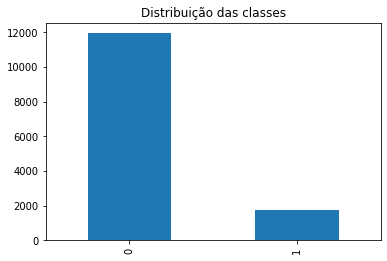

In [220]:
# balanceamento dos dados
print('Percentual de cada classe: \n',df.TARGET.value_counts(normalize=True),'\n')
df.TARGET.value_counts().plot(kind='bar').set_title('Distribuição das classes')

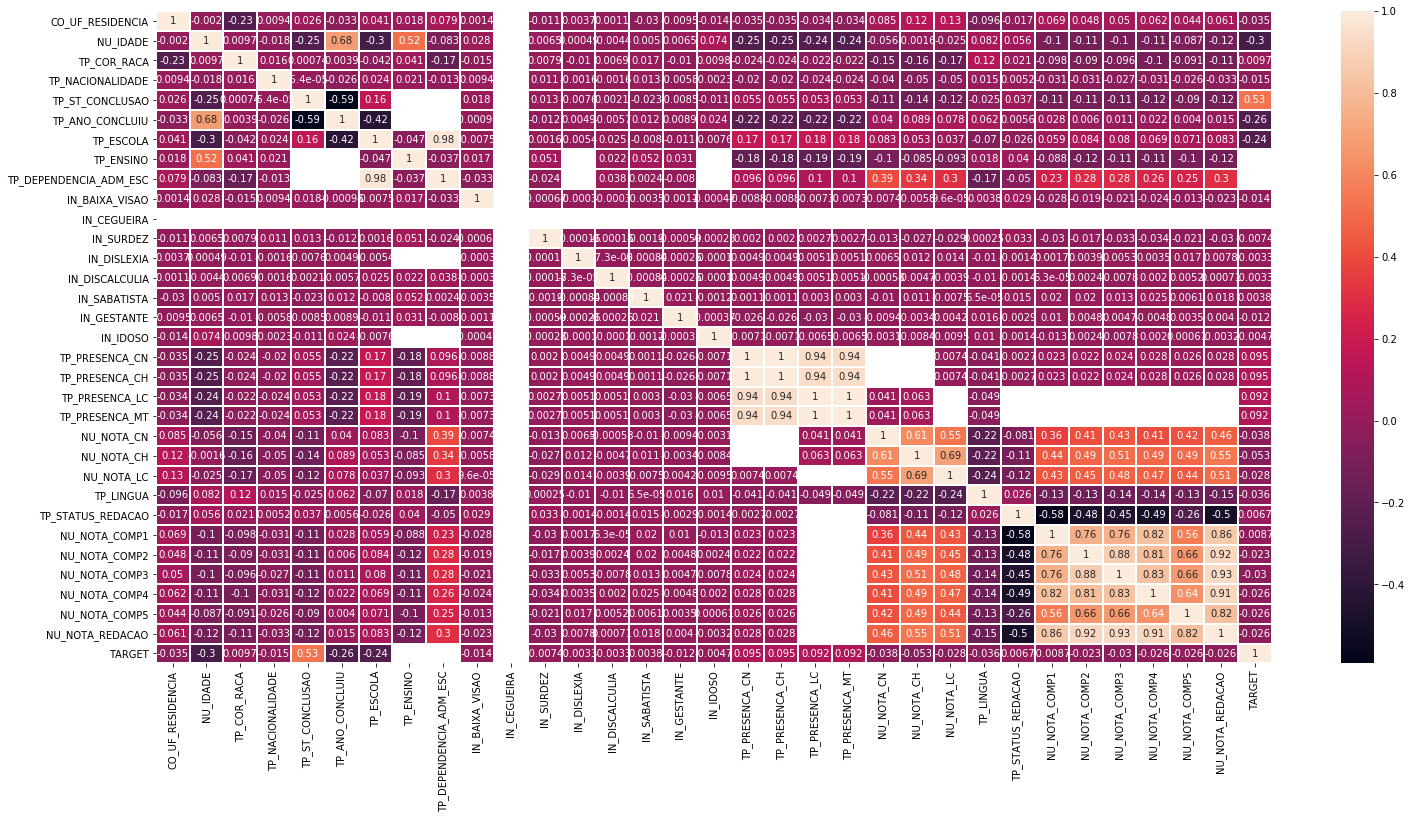

In [221]:
# Heatmap com as correlações 
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(),linewidths=1, annot=True)

In [222]:
df.corr()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,TARGET
CO_UF_RESIDENCIA,1.000000,-0.002017,-0.234786,0.009433,0.025822,-0.032538,0.041406,0.018145,0.079229,0.001360,NaN,-0.010716,0.003689,0.001093,-0.029933,-0.009503,-0.014365,-0.035438,-0.035438,-0.034287,-0.034287,0.084534,0.122825,0.128479,-0.096473,-0.016955,0.069195,0.047746,0.050400,0.061881,0.043565,0.060629,-0.034944
NU_IDADE,-0.002017,1.000000,0.009675,-0.017713,-0.253403,0.681435,-0.296328,0.516253,-0.082980,0.027907,NaN,0.006520,0.000492,-0.004355,0.004965,0.006482,0.074384,-0.245190,-0.245190,-0.241092,-0.241092,-0.056171,-0.001611,-0.024979,0.082065,0.055675,-0.102243,-0.114181,-0.104293,-0.110452,-0.086709,-0.116125,-0.295091
TP_COR_RACA,-0.234786,0.009675,1.000000,0.015761,0.000738,0.003942,-0.041713,0.040504,-0.172229,-0.014715,NaN,0.007852,-0.010046,0.006900,0.017208,-0.010376,0.009759,-0.024471,-0.024471,-0.021861,-0.021861,-0.149429,-0.161831,-0.168624,0.116860,0.020586,-0.097606,-0.090291,-0.096344,-0.102936,-0.091136,-0.107840,0.009676
TP_NACIONALIDADE,0.009433,-0.017713,0.015761,1.000000,-0.000054,-0.026154,0.024070,0.020522,-0.012981,0.009354,NaN,0.011142,-0.001611,-0.001611,0.012926,-0.005811,-0.002279,-0.020359,-0.020359,-0.024097,-0.024097,-0.039746,-0.049801,-0.049631,0.015266,0.005211,-0.031126,-0.030800,-0.027184,-0.031422,-0.025561,-0.032759,-0.015179
TP_ST_CONCLUSAO,0.025822,-0.253403,0.000738,-0.000054,1.000000,-0.592834,0.156222,NaN,NaN,0.018096,NaN,0.013379,-0.007585,0.002106,-0.022877,-0.008536,-0.010727,0.054831,0.054831,0.053252,0.053252,-0.111134,-0.139415,-0.117616,-0.025174,0.037078,-0.105647,-0.110186,-0.114245,-0.117711,-0.089861,-0.120580,0.533983
TP_ANO_CONCLUIU,-0.032538,0.681435,0.003942,-0.026154,-0.592834,1.000000,-0.422308,NaN,NaN,-0.000956,NaN,-0.011546,0.004918,-0.005693,0.011686,0.008906,0.023838,-0.216379,-0.216379,-0.216059,-0.216059,0.040447,0.088827,0.077917,0.061881,0.005578,0.027881,0.006023,0.011259,0.022018,0.003954,0.015097,-0.257710
TP_ESCOLA,0.041406,-0.296328,-0.041713,0.024070,0.156222,-0.422308,1.000000,-0.047195,0.975328,-0.007455,NaN,0.001588,-0.005403,0.025162,-0.008016,-0.011008,-0.007641,0.173854,0.173854,0.177822,0.177822,0.083383,0.052710,0.037254,-0.070008,-0.026380,0.059108,0.084441,0.079996,0.068909,0.071172,0.082520,-0.244562
TP_ENSINO,0.018145,0.516253,0.040504,0.020522,NaN,NaN,-0.047195,1.000000,-0.037207,0.017366,NaN,0.050508,NaN,0.022195,0.052293,0.031392,NaN,-0.182264,-0.182264,-0.194518,-0.194518,-0.100504,-0.085401,-0.092792,0.018257,0.040453,-0.088155,-0.115773,-0.107252,-0.114830,-0.103573,-0.119816,NaN
TP_DEPENDENCIA_ADM_ESC,0.079229,-0.082980,-0.172229,-0.012981,NaN,NaN,0.975328,-0.037207,1.000000,-0.033257,NaN,-0.023510,NaN,0.038079,0.002384,-0.008037,NaN,0.096449,0.096449,0.099585,0.099585,0.393774,0.338486,0.299387,-0.165051,-0.049705,0.233368,0.282586,0.282997,0.264291,0.252388,0.297040,NaN
IN_BAIXA_VISAO,0.001360,0.027907,-0.014715,0.009354,0.018096,-0.000956,-0.007455,0.017366,-0.033257,1.000000,NaN,-0.000672,-0.000300,-0.000300,-0.003482,-0.001084,-0.000425,-0.008757,-0.008757,-0.007335,-0.007335,-0.007359,-0.005793,0.000096,0.003828,0.029456,-0.027909,-0.018751,-0.020515,-0.023665,-0.013298,-0.022911,-0.013602


In [223]:
# Correlações ordenadas em ordem decrescente
df.corr().iloc[:,-1].sort_values(ascending=False)

TARGET                    1.000000
TP_ST_CONCLUSAO           0.533983
TP_PRESENCA_CH            0.094692
TP_PRESENCA_CN            0.094692
TP_PRESENCA_LC            0.092454
TP_PRESENCA_MT            0.092454
TP_COR_RACA               0.009676
TP_STATUS_REDACAO         0.006688
IN_SABATISTA              0.003824
IN_DISLEXIA              -0.003297
IN_DISCALCULIA           -0.003297
IN_IDOSO                 -0.004663
IN_SURDEZ                -0.007374
NU_NOTA_COMP1            -0.008709
IN_GESTANTE              -0.011893
IN_BAIXA_VISAO           -0.013602
TP_NACIONALIDADE         -0.015179
NU_NOTA_COMP2            -0.023308
NU_NOTA_COMP5            -0.025811
NU_NOTA_COMP4            -0.025958
NU_NOTA_REDACAO          -0.026328
NU_NOTA_LC               -0.028261
NU_NOTA_COMP3            -0.030147
CO_UF_RESIDENCIA         -0.034944
TP_LINGUA                -0.036395
NU_NOTA_CN               -0.037874
NU_NOTA_CH               -0.053460
TP_ESCOLA                -0.244562
TP_ANO_CONCLUIU     

---

***Alguns pontos de atenção que podemos destacar:***
- `Os dados possuem duas formas de classificar os valores categóricos: em alguns casos são usados números, e em outros letras, sendo necessário algum tipo de padronização.`
- `O dataset possui algumas colunas com um percentual muito alto de dados faltantes.`
- `As classes estão desbalanceadas.`
- `As variáveis NU_NOTA_COMP de 1 a 5 possuem altas taxas de colinearidade com NU_NOTA_REDACAO, o que pode ser confirmado pelo dicionário de dados`

***Algumas perguntas a serem respondidas:***
- `A divisão foi feita corretamente? Uma observação no dataset de treino se repete no de teste?`
- `A presença nos dias de prova pode ter importância diferente para quem está fazendo apenas para teste? Uma pessoa que está fazendo a prova apenas para treino pode ter uma tendencia maior de faltar ao exame?`
- `A idade do candidato tem influência com o fato dele ser treineiro?`
- `Os valores faltantes podem ser substituidos por outro valor? Ou será melhor eliminar a coluna?`
- `Quais variáveis não são significantes para o modelo?`

---

## A divisão foi feita corretamente? Uma observação no dataset de treino se repete no de teste?


In [224]:
 print('Quantidade de observações que constam nos conjuntos de treino e teste simultaneamente: ',len([i for i in dados.NU_INSCRICAO if i in teste.NU_INSCRICAO]))

Quantidade de observações que constam nos conjuntos de treino e teste simultaneamente:  0


---


***Como podemos ver acima, não temos os mesmos dados no treino e teste, e por isso as previsões dos modelos serão realmente feitas em cima de comportamentos aprendidos, em vez de simplesmente repetir um valor que ele viu no treinamento. Podemos inclusive descartar a coluna de incrição, pois ela não será necessária para o treinamento.***

## A presença nos dias de prova pode ter importância diferente para quem está fazendo apenas para teste? Uma pessoa que está fazendo a prova apenas para treino pode ter uma tendencia maior de faltar ao exame?


In [225]:
# atualizar os dados
labels_atuais = df.columns.to_list()
labels_atuais.remove('NU_INSCRICAO')
df = df[labels_atuais]

In [226]:
faltou_todos_dias = df[(df['TP_PRESENCA_CN'] == 0) & (df['TP_PRESENCA_CH'] == 0) & (df['TP_PRESENCA_LC'] == 0) & (df['TP_PRESENCA_MT'] == 0)].index

compareceu_todos_dias = df[(df['TP_PRESENCA_CN'] == 1) & (df['TP_PRESENCA_CH'] == 1) & (df['TP_PRESENCA_LC'] == 1) & (df['TP_PRESENCA_MT'] == 1)].index


# nova variável explicativa
df.loc[compareceu_todos_dias, 'TP_PRESENCA_ALL'] = 1
df.loc[faltou_todos_dias, 'TP_PRESENCA_ALL'] = 0
df.loc[df.TP_PRESENCA_ALL.isnull(),'TP_PRESENCA_ALL'] = 3


In [227]:
print(f'Total de alunos que compareceram todos os dias de prova: {df.iloc[compareceu_todos_dias,-1].shape[0]}\
\nTotal de alunos que faltaram todos os dias de prova: {df.iloc[faltou_todos_dias,-1].shape[0]}\
\nTotal de alunos que faltaram ao menos 1 dia de prova: {df[df.TP_PRESENCA_ALL == 3].shape[0]}')

Total de alunos que compareceram todos os dias de prova: 10097
Total de alunos que faltaram todos os dias de prova: 3348
Total de alunos que faltaram ao menos 1 dia de prova: 285


In [228]:
# Quanto cada tipo de presença representa com relação a classe
df.groupby('TARGET')['TP_PRESENCA_ALL'].value_counts(normalize=True)

TARGET  TP_PRESENCA_ALL
0       1.0                0.719762
        0.0                0.259898
        3.0                0.020340
1       1.0                0.840157
        0.0                0.136287
        3.0                0.023556
Name: TP_PRESENCA_ALL, dtype: float64

In [229]:
# Quanto cada tipo de presença representa com relação ao total de observações
df.groupby('TARGET')['TP_PRESENCA_ALL'].value_counts() / df.shape[0] *100

TARGET  TP_PRESENCA_ALL
0       1.0                62.629279
        0.0                22.614712
        3.0                 1.769847
1       1.0                10.910415
        0.0                 1.769847
        3.0                 0.305899
Name: TP_PRESENCA_ALL, dtype: float64

---


**Mesmo sem um teste estatístico mais elaborado podemos ver que os comportamentos permanecem similares nas duas classes, mesmo em comparação com todas as observações, o que nos leva a presumir que não existe uma correlação entre o candidato ser treineiro e o aumento na chance de faltar ao exame   
E com isso podemos retirar as colunas de presença e manter a nova**

## A idade do candidato tem influência com o fato dele ser treineiro?

In [230]:
# atualizar os dados
labels_atuais = [i for i in df.columns.to_list() if i not in ['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT']]
df = df[labels_atuais]


In [231]:
df['NU_IDADE'].describe()

count    13730.000000
mean        21.593809
std          7.043654
min         13.000000
25%         17.000000
50%         19.000000
75%         23.000000
max         67.000000
Name: NU_IDADE, dtype: float64

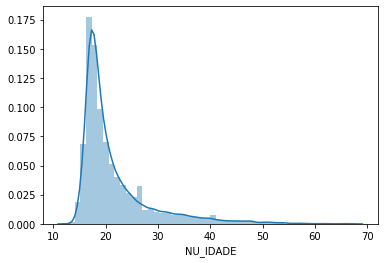

In [232]:
# Distribuição das idades
sns.distplot(df['NU_IDADE'])

In [233]:
df['NU_IDADE'].value_counts()

17    2630
18    2278
19    1455
20    1036
16    1018
21     757
22     600
23     496
24     387
25     342
15     272
26     241
27     235
29     193
28     177
30     147
31     143
32     136
34     116
35     115
33     114
36      87
37      84
40      72
38      69
39      67
41      47
42      44
44      36
48      36
45      34
47      34
43      34
46      31
51      21
50      21
14      21
54      17
52      17
53      12
49      11
57       8
56       8
61       5
65       4
58       4
59       4
62       3
66       3
55       3
63       1
64       1
60       1
13       1
67       1
Name: NU_IDADE, dtype: int64

In [234]:
# avaliar algumas faixas etárias
qtd_anterior = 0
for i in range(15,32):
    print('\nFaixa etária menor que ',i, ' anos')
    print('Quantidade:\n',df[df['NU_IDADE'] < i]['TARGET'].value_counts())
    print('\nPercentual:\n',df[df['NU_IDADE'] < i]['TARGET'].value_counts(normalize=True))
    print('\nAumento com relação a faixa anterior:\n',df[df['NU_IDADE'] < i]['TARGET'].value_counts() - qtd_anterior)
    print('\n------------------------------------------------------------------')
    qtd_anterior = df[df['NU_IDADE'] < i]['TARGET'].value_counts()


Faixa etária menor que  15  anos
Quantidade:
 1    15
0     7
Name: TARGET, dtype: int64

Percentual:
 1    0.681818
0    0.318182
Name: TARGET, dtype: float64

Aumento com relação a faixa anterior:
 1    15
0     7
Name: TARGET, dtype: int64

------------------------------------------------------------------

Faixa etária menor que  16  anos
Quantidade:
 1    283
0     11
Name: TARGET, dtype: int64

Percentual:
 1    0.962585
0    0.037415
Name: TARGET, dtype: float64

Aumento com relação a faixa anterior:
 1    268
0      4
Name: TARGET, dtype: int64

------------------------------------------------------------------

Faixa etária menor que  17  anos
Quantidade:
 1    1144
0     168
Name: TARGET, dtype: int64

Percentual:
 1    0.871951
0    0.128049
Name: TARGET, dtype: float64

Aumento com relação a faixa anterior:
 1    861
0    157
Name: TARGET, dtype: int64

------------------------------------------------------------------

Faixa etária menor que  18  anos
Quantidade:
 0    22

***Observando a distribuição dos dados podemos notar alguns comportamentos:*** 
- A maior parte dos candidatos se concentram na faixa de idade entre 17 e 23 anos
- Idades até 16 anos possuem classe majoritária 1 (treineiro) a partir dos 17 anos isso se inverte e passamos a ter a maioria de classe 0 (não treineiro), o que ocorre até o final do intervalo de valores testados.   
- Os ultimos grupos de candidatos que prestaram a prova como treineiros tinham idades de até 18 anos, a partir dos 19 e até o final do intervalo testado (30 anos) a quantidade de treineiros permaneceu inalterada.

## Os valores faltantes podem ser substituidos por outro valor? Ou será melhor eliminar a coluna?

In [235]:
labels_faltantes = ['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC','NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC', 'TP_STATUS_REDACAO','NU_NOTA_COMP1',
                    'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO','Q027']
df[labels_faltantes].isnull().sum() / df.shape[0]

TP_ENSINO                 0.688128
TP_DEPENDENCIA_ADM_ESC    0.688128
NU_NOTA_CN                0.246832
NU_NOTA_CH                0.246832
NU_NOTA_LC                0.261981
TP_STATUS_REDACAO         0.261981
NU_NOTA_COMP1             0.261981
NU_NOTA_COMP2             0.261981
NU_NOTA_COMP3             0.261981
NU_NOTA_COMP4             0.261981
NU_NOTA_COMP5             0.261981
NU_NOTA_REDACAO           0.261981
Q027                      0.536999
dtype: float64

In [236]:
df[labels_faltantes].nunique()

TP_ENSINO                    3
TP_DEPENDENCIA_ADM_ESC       4
NU_NOTA_CN                2692
NU_NOTA_CH                2978
NU_NOTA_LC                2774
TP_STATUS_REDACAO            9
NU_NOTA_COMP1               15
NU_NOTA_COMP2               13
NU_NOTA_COMP3               12
NU_NOTA_COMP4               14
NU_NOTA_COMP5               14
NU_NOTA_REDACAO             53
Q027                        13
dtype: int64

---

***Baseado nas observações dos dados, correlações e no dicionário de dados, foi decidido que não vale o esforço de tentar algum tipo de modelagem com esses dados faltantes, pelos motivos abaixo:***

- `NU_NOTA_CN`, `NU_NOTA_CH`, `NU_NOTA_LC`, `TP_STATUS_REDACAO` -->  Como o objetivo do projeto é uma classificação binária, o valor de nota dos candidatos não é tão interessante para a modelagem desse tipo de problema, algo que fica mais evidente quando olhamos os valores de correlação de todas as variáveis que representam as notas dos candidatos com o target do modelo
 
- `NU_NOTA_COMP1`, `NU_NOTA_COMP2`, `NU_NOTA_COMP3`, `NU_NOTA_COMP4`, `NU_NOTA_COMP5`, `NU_NOTA_REDACAO` --> Além dos problemas mencionados acima, as notas complementares de redação tem uma alta taxa de Colinearidade, o que pode afetar negativamente o modelo, mesmo se fosse um projeto de regressão.

- `TP_ENSINO` --> Quase sua totalidade é composta por dados faltantes (68,81%) 
- `TP_DEPENDENCIA_ADM_ESC`  --> Idem ao anterior.
- `Q027` --> Mesmo problema dos casos anteriores, esta variável até poderia ser usada para a modelagem, já que define a idade que começou a trabalhar, e pelas análises feitas anteriormente, as pessoas com maior idade tem a tendencia de não serem mais treineiros, mas pela alta taxa de dados faltantes e por já ter uma outra variável que pode explicar o mesmo caso, foi decidido a remoção da mesma.


## Quais variáveis não são significantes para o modelo?

In [237]:
# atualizar os dados
labels_atuais = [i for i in df.columns.to_list() if i not in labels_faltantes]
df = df[labels_atuais]
df

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_LINGUA,Q001,Q002,Q006,Q024,Q025,Q026,Q047,TARGET,TP_PRESENCA_ALL
0,43,RS,24,M,1,1,1,4,1,0,0,0,0,0,0,0,0,1,D,D,C,A,A,C,A,0,1.0
1,23,CE,17,F,3,1,2,0,2,0,0,0,0,0,0,0,0,1,A,A,B,A,A,A,A,0,1.0
2,23,CE,21,F,3,1,3,0,1,0,0,0,0,0,0,0,0,1,D,D,C,A,A,A,A,0,0.0
3,33,RJ,25,F,0,1,1,9,1,0,0,0,0,0,0,0,0,0,H,E,E,C,B,C,D,0,0.0
4,13,AM,28,M,2,1,1,4,1,0,0,0,0,0,0,0,0,1,E,D,C,A,A,B,A,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,35,SP,20,M,1,1,1,3,1,0,0,0,0,0,0,0,0,0,E,E,G,B,B,B,A,0,1.0
13726,26,PE,33,F,3,2,1,10,1,0,0,0,0,0,0,0,0,1,A,A,C,A,B,B,A,0,1.0
13727,43,RS,15,F,1,1,3,0,1,0,0,0,0,0,0,0,0,0,C,G,B,A,B,A,A,1,1.0
13728,33,RJ,36,M,3,1,4,0,1,0,0,0,0,0,0,0,0,1,B,D,G,B,B,C,A,0,1.0


In [238]:
# Olhando as variáveis numéricas
df.corr().loc['TARGET'].sort_values()

NU_IDADE           -0.295091
TP_ANO_CONCLUIU    -0.257710
TP_ESCOLA          -0.244562
TP_LINGUA          -0.036395
CO_UF_RESIDENCIA   -0.034944
TP_NACIONALIDADE   -0.015179
IN_BAIXA_VISAO     -0.013602
IN_GESTANTE        -0.011893
IN_SURDEZ          -0.007374
IN_IDOSO           -0.004663
IN_DISCALCULIA     -0.003297
IN_DISLEXIA        -0.003297
IN_SABATISTA        0.003824
TP_COR_RACA         0.009676
TP_PRESENCA_ALL     0.081749
TP_ST_CONCLUSAO     0.533983
TARGET              1.000000
IN_CEGUEIRA              NaN
Name: TARGET, dtype: float64

In [239]:
# variáveis numéricas com menor valor de correlação
menor_correlacao = ['TP_LINGUA',
 'CO_UF_RESIDENCIA',
 'TP_NACIONALIDADE',
 'IN_BAIXA_VISAO',
 'IN_GESTANTE',
 'IN_SURDEZ',
 'IN_IDOSO',
 'IN_DISCALCULIA',
 'IN_DISLEXIA',
 'IN_SABATISTA',
 'TP_COR_RACA',
 'IN_CEGUEIRA']

In [240]:
# analisar as variáveis categóricas
cat = ['SG_UF_RESIDENCIA', 'TP_SEXO','Q001','Q002','Q006','Q024','Q025','Q026','Q047', 'TARGET']
df[cat].nunique()

SG_UF_RESIDENCIA    27
TP_SEXO              2
Q001                 8
Q002                 8
Q006                17
Q024                 5
Q025                 2
Q026                 3
Q047                 5
TARGET               2
dtype: int64

In [257]:
cat[::9]

['SG_UF_RESIDENCIA', 'TARGET']

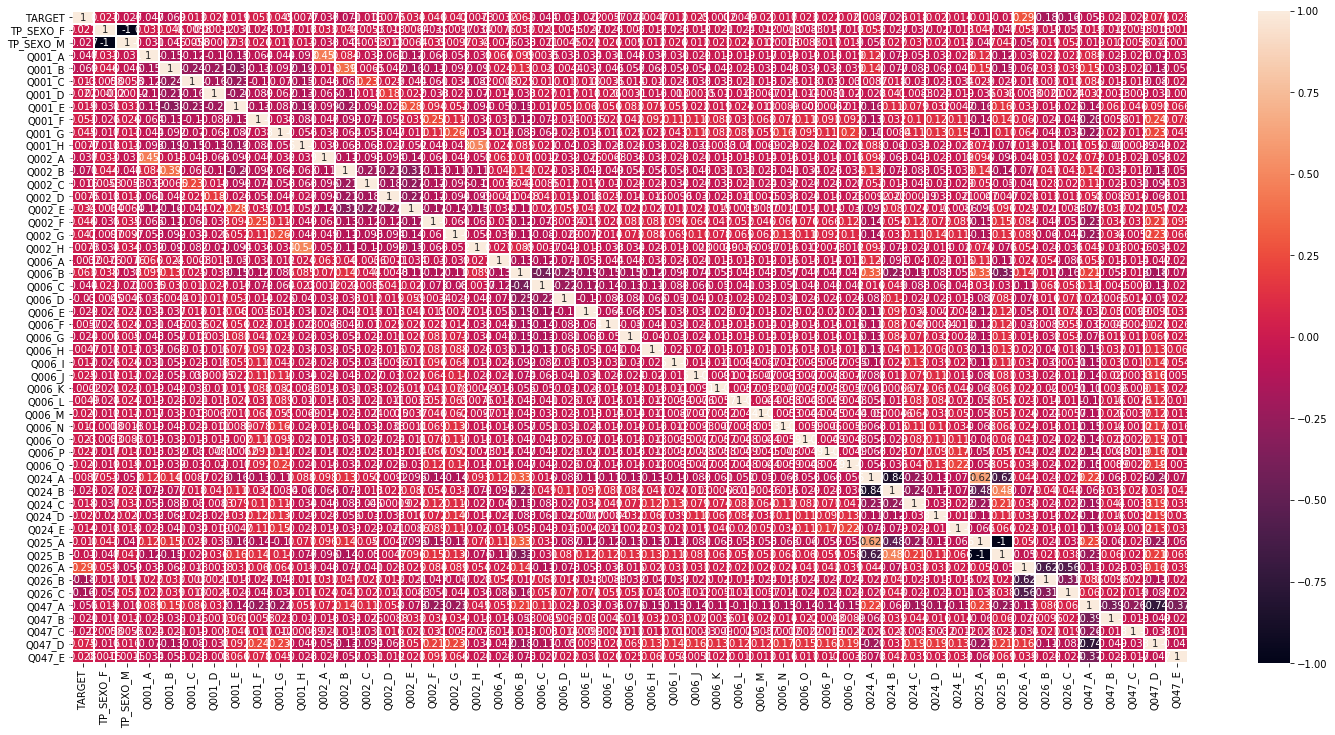

In [258]:
dummies = pd.get_dummies(df[cat[1:]])

# SG_UF_RESIDENCIA tem muitos valores, vai ficar dificil de ver o heatmap com todas as variáveis e por isso vai ser separada
dummies_uf = pd.get_dummies(df[cat[::9]])


plt.figure(figsize=(25,12))
sns.heatmap(dummies.corr(),linewidths=1, annot=True)

In [259]:
dummies.corr()

,TARGET,TP_SEXO_F,TP_SEXO_M,Q001_A,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_A,Q002_B,Q002_C,Q002_D,Q002_E,Q002_F,Q002_G,Q002_H,Q006_A,Q006_B,Q006_C,Q006_D,Q006_E,Q006_F,Q006_G,Q006_H,Q006_I,Q006_J,Q006_K,Q006_L,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q,Q024_A,Q024_B,Q024_C,Q024_D,Q024_E,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
TARGET,1.000000,0.026916,-0.026916,-0.046718,-0.068751,0.013315,0.022150,0.019302,0.051189,0.045154,0.007686,-0.037432,-0.070587,-0.015919,0.007549,0.034036,0.046482,0.046846,0.007290,-0.003223,0.062871,-0.043599,-0.030399,-0.021814,-0.005662,-0.023985,0.004674,0.011511,0.025000,-0.000204,0.004921,0.020093,0.016565,0.023272,0.022128,0.020140,0.008692,-0.024938,0.018433,0.019724,0.013978,0.010006,-0.010006,0.286829,-0.175192,-0.161568,-0.055082,-0.020942,-0.022147,0.074933,0.027695
TP_SEXO_F,0.026916,1.000000,-1.000000,0.031196,0.046143,-0.005840,0.000120,-0.030964,-0.026013,-0.016956,-0.013357,0.032893,0.043603,0.005335,-0.012615,-0.006442,-0.035305,-0.009715,-0.033810,0.007551,0.037596,0.021163,-0.004511,-0.021501,-0.026146,-0.004993,-0.011821,-0.026156,-0.012440,-0.021047,-0.024459,-0.011900,-0.001768,-0.008272,-0.017199,-0.019111,0.053182,-0.026825,-0.036988,-0.020363,-0.017879,0.047235,-0.047235,0.059166,-0.018582,-0.051844,0.018824,-0.011650,-0.005811,-0.015778,0.001473
TP_SEXO_M,-0.026916,-1.000000,1.000000,-0.031196,-0.046143,0.005840,-0.000120,0.030964,0.026013,0.016956,0.013357,-0.032893,-0.043603,-0.005335,0.012615,0.006442,0.035305,0.009715,0.033810,-0.007551,-0.037596,-0.021163,0.004511,0.021501,0.026146,0.004993,0.011821,0.026156,0.012440,0.021047,0.024459,0.011900,0.001768,0.008272,0.017199,0.019111,-0.053182,0.026825,0.036988,0.020363,0.017879,-0.047235,0.047235,-0.059166,0.018582,0.051844,-0.018824,0.011650,0.005811,0.015778,-0.001473
Q001_A,-0.046718,0.031196,-0.031196,1.000000,-0.152240,-0.116285,-0.102683,-0.145260,-0.063510,-0.043952,-0.093052,0.453526,0.084050,-0.038971,-0.061037,-0.124696,-0.065185,-0.053309,-0.038902,0.066358,0.098730,0.003484,-0.035974,-0.033995,-0.031448,-0.047506,-0.037167,-0.030564,-0.021833,-0.018784,-0.018633,-0.017134,-0.019335,-0.018777,-0.014940,-0.018777,0.117908,-0.078920,-0.054578,-0.032173,-0.022789,0.117777,-0.117777,-0.037542,0.022081,0.022043,0.088749,-0.025164,-0.024164,-0.070156,-0.034144
Q001_B,-0.068751,0.046143,-0.046143,-0.152240,1.000000,-0.242538,-0.214169,-0.302973,-0.132466,-0.091671,-0.194080,-0.016093,0.392615,0.006521,-0.041780,-0.158366,-0.107526,-0.092488,-0.089782,0.024455,0.128571,0.029512,-0.004355,-0.037369,-0.045744,-0.057048,-0.062709,-0.059480,-0.054334,-0.042382,-0.026459,-0.033040,-0.047532,-0.039163,-0.032478,-0.039163,0.140562,-0.076886,-0.083035,-0.062415,-0.041432,0.146656,-0.146656,-0.061676,0.033308,0.039344,0.148545,-0.034530,-0.020569,-0.130190,-0.055631
Q001_C,0.013315,-0.005840,0.005840,-0.116285,-0.242538,1.000000,-0.163587,-0.231417,-0.101180,-0.070020,-0.148243,-0.046042,-0.060983,0.231864,0.028752,-0.044050,-0.060972,-0.034316,-0.082359,-0.000803,0.024505,0.010410,0.010087,0.017774,0.003496,-0.013627,-0.009959,-0.026164,-0.032745,-0.033099,-0.020919,-0.017770,-0.024332,-0.018314,-0.030366,-0.029914,0.008667,0.018194,-0.029882,-0.026173,-0.033911,0.029358,-0.029358,-0.017554,0.003009,0.018024,0.085907,-0.015814,-0.019170,-0.079889,-0.022793
Q001_D,0.022150,0.000120,-0.000120,-0.102683,-0.214169,-0.163587,1.000000,-0.204349,-0.089345,-0.061830,-0.130903,-0.064523,-0.099567,0.017529,0.183453,0.021859,-0.033198,-0.024604,-0.069734,-0.014142,-0.032799,0.026547,0.016588,0.017704,0.026331,0.003082,-0.014624,-0.012938,0.000350,-0.009996,-0.013433,-0.006743,-0.011111,-0.013731,-0.008069,-0.020073,-0.028168,0.041317,-0.008287,-0.024048,-0.018967,-0.035693,0.035693,-0.003811,0.002059,0.002430,0.031645,-0.001290,-0.009033,-0.031428,-0.008007
Q001_E,0.019302,-0.030964,0.030964,-0.145260,-0.302973,-0.231417,-0.204349,1.000000,-0.126392,-0.087468,-0.185181,-0.099342,-0.197158,-0.092449,-0.025

In [260]:
dummies.corr().iloc[:,0].sort_values(ascending=False)

TARGET       1.000000
Q026_A       0.286829
Q047_D       0.074933
Q006_B       0.062871
Q001_F       0.051189
Q002_G       0.046846
Q002_F       0.046482
Q001_G       0.045154
Q002_E       0.034036
Q047_E       0.027695
TP_SEXO_F    0.026916
Q006_J       0.025000
Q006_O       0.023272
Q001_D       0.022150
Q006_P       0.022128
Q006_Q       0.020140
Q006_M       0.020093
Q024_D       0.019724
Q001_E       0.019302
Q024_C       0.018433
Q006_N       0.016565
Q024_E       0.013978
Q001_C       0.013315
Q006_I       0.011511
Q025_A       0.010006
Q024_A       0.008692
Q001_H       0.007686
Q002_D       0.007549
Q002_H       0.007290
Q006_L       0.004921
Q006_H       0.004674
Q006_K      -0.000204
Q006_A      -0.003223
Q006_F      -0.005662
Q025_B      -0.010006
Q002_C      -0.015919
Q047_B      -0.020942
Q006_E      -0.021814
Q047_C      -0.022147
Q006_G      -0.023985
Q024_B      -0.024938
TP_SEXO_M   -0.026916
Q006_D      -0.030399
Q002_A      -0.037432
Q006_C      -0.043599
Q001_A    

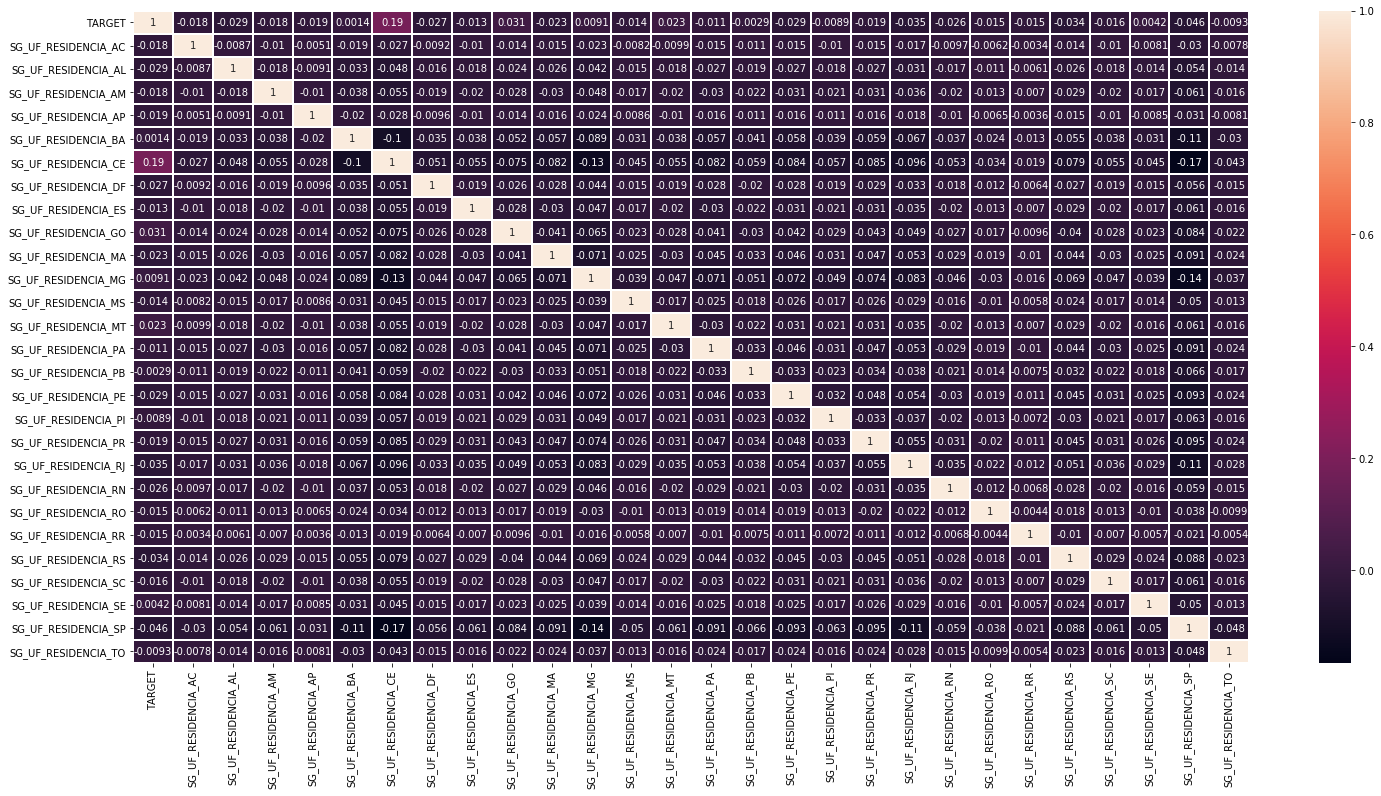

In [261]:
# Verificar a
plt.figure(figsize=(25,12))
sns.heatmap(dummies_uf.corr(),linewidths=1, annot=True)

In [262]:
dummies_uf.corr()

,TARGET,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_MT,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_PB,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_PI,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_RN,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_RR,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_TO
TARGET,1.000000,-0.017725,-0.028726,-0.017944,-0.019306,0.001363,0.185026,-0.027112,-0.012940,0.030950,-0.023457,0.009076,-0.013616,0.023065,-0.010797,-0.002942,-0.028596,-0.008890,-0.019285,-0.034521,-0.026335,-0.014777,-0.014537,-0.034298,-0.016223,0.004223,-0.046397,-0.009264
SG_UF_RESIDENCIA_AC,-0.017725,1.000000,-0.008727,-0.009993,-0.005120,-0.018679,-0.027070,-0.009181,-0.009955,-0.013642,-0.014878,-0.023352,-0.008229,-0.009937,-0.014891,-0.010748,-0.015216,-0.010323,-0.015446,-0.017465,-0.009691,-0.006235,-0.003437,-0.014386,-0.009974,-0.008139,-0.030074,-0.007770
SG_UF_RESIDENCIA_AL,-0.028726,-0.008727,1.000000,-0.017784,-0.009112,-0.033244,-0.048178,-0.016339,-0.017718,-0.024279,-0.026479,-0.041560,-0.014645,-0.017685,-0.026502,-0.019129,-0.027080,-0.018372,-0.027490,-0.031083,-0.017247,-0.011097,-0.006117,-0.025604,-0.017751,-0.014485,-0.053524,-0.013829
SG_UF_RESIDENCIA_AM,-0.017944,-0.009993,-0.017784,1.000000,-0.010433,-0.038063,-0.055162,-0.018708,-0.020287,-0.027799,-0.030318,-0.047585,-0.016768,-0.020249,-0.030344,-0.021902,-0.031006,-0.021035,-0.031475,-0.035589,-0.019747,-0.012706,-0.007004,-0.029315,-0.020325,-0.016585,-0.061283,-0.015834
SG_UF_RESIDENCIA_AP,-0.019306,-0.005120,-0.009112,-0.010433,1.000000,-0.019502,-0.028262,-0.009585,-0.010394,-0.014243,-0.015533,-0.024380,-0.008591,-0.010374,-0.015547,-0.011221,-0.015886,-0.010777,-0.016126,-0.018234,-0.010118,-0.006510,-0.003589,-0.015020,-0.010413,-0.008497,-0.031398,-0.008113
SG_UF_RESIDENCIA_BA,0.001363,-0.018679,-0.033244,-0.038063,-0.019502,1.000000,-0.103113,-0.034970,-0.037921,-0.051963,-0.056672,-0.088949,-0.031344,-0.037850,-0.056722,-0.040940,-0.057958,-0.039320,-0.058835,-0.066525,-0.036913,-0.023751,-0.013093,-0.054798,-0.037992,-0.031002,-0.114554,-0.029598
SG_UF_RESIDENCIA_CE,0.185026,-0.027070,-0.048178,-0.055162,-0.028262,-0.103113,1.000000,-0.050680,-0.054957,-0.075306,-0.082131,-0.128908,-0.045424,-0.054853,-0.082203,-0.059332,-0.083995,-0.056984,-0.085266,-0.096410,-0.053496,-0.034421,-0.018974,-0.079415,-0.055060,-0.044929,-0.166016,-0.042895
SG_UF_RESIDENCIA_DF,-0.027112,-0.009181,-0.016339,-0.018708,-0.009585,-0.034970,-0.050680,1.000000,-0.018638,-0.025540,-0.027854,-0.043718,-0.015405,-0.018603,-0.027879,-0.020122,-0.028486,-0.019326,-0.028917,-0.032697,-0.018143,-0.011673,-0.006435,-0.026933,-0.018673,-0.015237,-0.056303,-0.014548
SG_UF_RESIDENCIA_ES,-0.012940,-0.009955,-0.017718,-0.020287,-0.010394,-0.037921,-0.054957,-0.018638,1.000000,-0.027695,-0.030205,-0.047408,-0.016705,-0.020173,-0.030231,-0.021820,-0.030890,-0.020956,-0.031358,-0.035456,-0.019674,-0.012659,-0.006978,-0.029206,-0.020249,-0.016523,-0.061055,-0.015775
SG_UF_RESIDENCIA_GO,0.030950,-0.013642,-0.024279,-0.027799,-0.014243,-0.051963,-0.075306,-0.025540,-0.027695,1.000000,-0.041389,-0.064962,-0.022891,-0.027643,-0.041425,-0.029900,-0.042328,-0.028716,-0.042969,-0.048585,-0.026959,-0.017346,-0.009562,-0.040021,-0.027747,-0.022642,-0.083662,-0.021616


In [265]:
dummies_uf.corr().iloc[:,0].sort_values(ascending=False)

TARGET                 1.000000
SG_UF_RESIDENCIA_CE    0.185026
SG_UF_RESIDENCIA_GO    0.030950
SG_UF_RESIDENCIA_MT    0.023065
SG_UF_RESIDENCIA_MG    0.009076
SG_UF_RESIDENCIA_SE    0.004223
SG_UF_RESIDENCIA_BA    0.001363
SG_UF_RESIDENCIA_PB   -0.002942
SG_UF_RESIDENCIA_PI   -0.008890
SG_UF_RESIDENCIA_TO   -0.009264
SG_UF_RESIDENCIA_PA   -0.010797
SG_UF_RESIDENCIA_ES   -0.012940
SG_UF_RESIDENCIA_MS   -0.013616
SG_UF_RESIDENCIA_RR   -0.014537
SG_UF_RESIDENCIA_RO   -0.014777
SG_UF_RESIDENCIA_SC   -0.016223
SG_UF_RESIDENCIA_AC   -0.017725
SG_UF_RESIDENCIA_AM   -0.017944
SG_UF_RESIDENCIA_PR   -0.019285
SG_UF_RESIDENCIA_AP   -0.019306
SG_UF_RESIDENCIA_MA   -0.023457
SG_UF_RESIDENCIA_RN   -0.026335
SG_UF_RESIDENCIA_DF   -0.027112
SG_UF_RESIDENCIA_PE   -0.028596
SG_UF_RESIDENCIA_AL   -0.028726
SG_UF_RESIDENCIA_RS   -0.034298
SG_UF_RESIDENCIA_RJ   -0.034521
SG_UF_RESIDENCIA_SP   -0.046397
Name: TARGET, dtype: float64

In [366]:
df.groupby('Q001')['TARGET'].value_counts()


Q001  TARGET
A     0          867
      1           67
B     0         3015
      1          294
C     0         1845
      1          301
D     0         1474
      1          259
E     0         2642
      1          437
F     0          573
      1          146
G     0          275
      1           79
H     0         1256
      1          200
Name: TARGET, dtype: int64

In [367]:
df.groupby('Q002')['TARGET'].value_counts()

Q002  TARGET
A     0          596
      1           47
B     0         2414
      1          213
C     0         1908
      1          254
D     0         1800
      1          283
E     0         3308
      1          575
F     0          784
      1          180
G     0          518
      1          130
H     0          619
      1          101
Name: TARGET, dtype: int64


Coluna | Descrição | DETALHAMENTO DOS ITENS
------ | ----------|-------
Q001|Até que série seu pai, ou o homem responsável por você, estudou?|A Nunca estudou. - B Não completou a 4ª série/5º ano do Ensino Fundamental. - C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental. - D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio. - E Completou o Ensino Médio, mas não completou a Faculdade. - F Completou a Faculdade, mas não completou a Pós-graduação. - G Completou a Pós-graduação. - H Não sei.|
Q002|Até que série sua mãe, ou a mulher responsável por você, estudou?|A Nunca estudou. - B Não completou a 4ª série/5º ano do Ensino Fundamental. - C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental. - D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio. - E Completou o Ensino Médio, mas não completou a Faculdade. - F Completou a Faculdade, mas não completou a Pós-graduação. - G Completou a Pós-graduação. - H Não sei.|
Q006|Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)|``A Nenhuma renda. - B Até R$ 880,00 C De R$ 880,01 até R$ 1.320,00. - D De R$ 1.320,01 até R$ 1.760,00. - E De R$ 1.760,01 até R$ 2.200,00. - F De R$ 2.200,01 até R$ 2.640,00. - G De R$ 2.640,01 até R$ 3.520,00. - H De R$ 3.520,01 até R$ 4.400,00. - I De R$ 4.400,01 até R$ 5.280,00. - J De R$ 5.280,01 até R$ 6.160,00. - K De R$$ 6.160,01 até R$ 7.040,00. - L De R$ 7.040,01 até R$ 7.920,00. - M De R$ 7.920,01 até R$ 8.800,00. - N De R$ 8.800,01 até R$ 10.560,00. - O De R$ 10.560,01 até R$ 13.200,00. - P De R$ 13.200,01 até R$ 17.600,00. - Q Mais de R$ 17.600,00.``|
Q026|Você exerce ou já exerceu atividade remunerada?|A Não, nunca trabalhei. - B Sim, já trabalhei, mas não estou trabalhando. - C Sim, estou trabalhando.|
Q047|Em que tipo de escola você frequentou o Ensino Médio?|A Somente em escola pública. - B Parte em escola pública e parte em escola privada sem bolsa de estudo integral. - C Parte em escola pública e parte em escola privada com bolsa de estudo integral. - D Somente em escola privada sem bolsa de estudo integral. - E Somente em escola privada com bolsa de estudo integral.|

In [264]:
cat_retiradas = ['SG_UF_RESIDENCIA','TP_SEXO','Q001','Q002','Q006','Q024','Q025','Q047']

---

***Para diminuir a quantidade de variáveis, foi analisado os valores das correlações em conjunto dos valores das entre elas.*** 
- `Para as variáveis numéricas, foi retirada aquelas que possuiam os menores valores.`
- `Para as variáveis categóricas, foi primeiramente usado a técnica de criação de variáveis dummies, para que fosse possível a aplicação da técnica de correlação e verificar a importância de cada categoria`
    - `SG_UF_RESIDENCIA possui uma taxa mais alta quando o candidato vem do CE, mas como os valores para os demais estados são muito baixos ficou decidido pela exclusão da coluna`



In [266]:
# atualizar os dados
labels_atuais = [i for i in df.columns.to_list() if i not in menor_correlacao]
df = df[labels_atuais]
df

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,Q001,Q002,Q006,Q024,Q025,Q026,Q047,TARGET,TP_PRESENCA_ALL
0,RS,24,M,1,4,1,D,D,C,A,A,C,A,0,1.0
1,CE,17,F,2,0,2,A,A,B,A,A,A,A,0,1.0
2,CE,21,F,3,0,1,D,D,C,A,A,A,A,0,0.0
3,RJ,25,F,1,9,1,H,E,E,C,B,C,D,0,0.0
4,AM,28,M,1,4,1,E,D,C,A,A,B,A,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,SP,20,M,1,3,1,E,E,G,B,B,B,A,0,1.0
13726,PE,33,F,1,10,1,A,A,C,A,B,B,A,0,1.0
13727,RS,15,F,3,0,1,C,G,B,A,B,A,A,1,1.0
13728,RJ,36,M,4,0,1,B,D,G,B,B,C,A,0,1.0


In [267]:
# atualizar os dados
labels_atuais = [i for i in df.columns.to_list() if i not in cat_retiradas]
df = df[labels_atuais]
df

,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,Q001,Q002,Q026,TARGET,TP_PRESENCA_ALL
0,24,1,4,1,D,D,C,0,1.0
1,17,2,0,2,A,A,A,0,1.0
2,21,3,0,1,D,D,A,0,0.0
3,25,1,9,1,H,E,C,0,0.0
4,28,1,4,1,E,D,B,0,0.0
...,...,...,...,...,...,...,...,...,...
13725,20,1,3,1,E,E,B,0,1.0
13726,33,1,10,1,A,A,B,0,1.0
13727,15,3,0,1,C,G,A,1,1.0
13728,36,4,0,1,B,D,C,0,1.0


***


***Depois de terminada as análises ficou decidido o uso das variáveis abaixo:***
- `NU_IDADE`
- `TP_ST_CONCLUSAO`
- `TP_ANO_CONCLUIU`
- `TP_ESCOLA`
- `TP_PRESENCA_CN`
- `TP_PRESENCA_CH`
- `TP_PRESENCA_LC`
- `TP_PRESENCA_MT`
- `Q026`


# Feature Engineering


Mesmo com a seleção das variáveis, ainda é necessário a realização de algumas transformações a fim que se extraia a maior quantidade possível de valor dos dados.

## Testes para decidir sobre a criação de novas categorias e manipulações necessárias

In [368]:
# carregar novamente os dados para limpar qualquer alteração feita anteriormente

df = dados[labels].copy()
df['TARGET'] = dados['IN_TREINEIRO'].copy()

labels_final = ['NU_IDADE','TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 
                'TP_PRESENCA_LC', 'TP_PRESENCA_MT','Q026', 'TARGET',]

df = df[labels_final]

# Verificar novamente a correlação para poder comparar depois das transformações
df.corr().iloc[:,-1].sort_values(ascending=False)

TARGET             1.000000
TP_ST_CONCLUSAO    0.533983
TP_PRESENCA_CH     0.094692
TP_PRESENCA_CN     0.094692
TP_PRESENCA_MT     0.092454
TP_PRESENCA_LC     0.092454
TP_ESCOLA         -0.244562
TP_ANO_CONCLUIU   -0.257710
NU_IDADE          -0.295091
Name: TARGET, dtype: float64

In [369]:
#testar as correlações

In [370]:
df['TP_ST_CONCLUSAO'] = df['TP_ST_CONCLUSAO'].map({1:'A', 2:'B',3:'C',4:'D'})
df['TP_ANO_CONCLUIU'] = df['TP_ANO_CONCLUIU'].map({0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G', 7:'H', 8:'I', 9:'J',10:'K'})
df['TP_ESCOLA'] = df['TP_ESCOLA'].map({1:'A',2:'B',3:'C',4:'D'})
teste = pd.get_dummies(df[['TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA','TARGET']]) 
teste.corr().iloc[:,0].sort_values(ascending=False)

TARGET               1.000000
TP_ST_CONCLUSAO_C    0.859856
TP_ANO_CONCLUIU_A    0.367584
TP_ESCOLA_A          0.260120
TP_ESCOLA_D         -0.003297
TP_ANO_CONCLUIU_J   -0.046249
TP_ANO_CONCLUIU_I   -0.049412
TP_ANO_CONCLUIU_H   -0.057146
TP_ANO_CONCLUIU_F   -0.065089
TP_ANO_CONCLUIU_G   -0.065442
TP_ANO_CONCLUIU_E   -0.079883
TP_ESCOLA_C         -0.080326
TP_ST_CONCLUSAO_D   -0.083799
TP_ANO_CONCLUIU_D   -0.090347
TP_ANO_CONCLUIU_C   -0.110191
TP_ANO_CONCLUIU_K   -0.117743
TP_ANO_CONCLUIU_B   -0.139212
TP_ESCOLA_B         -0.235201
TP_ST_CONCLUSAO_B   -0.260120
TP_ST_CONCLUSAO_A   -0.367584
Name: TARGET, dtype: float64

In [371]:
df.groupby('TP_ST_CONCLUSAO')['TARGET'].value_counts()

TP_ST_CONCLUSAO  TARGET
A                0         6524
B                0         4283
C                1         1783
                 0          523
D                0          617
Name: TARGET, dtype: int64

In [372]:
df.groupby('TP_ANO_CONCLUIU')['TARGET'].value_counts()

TP_ANO_CONCLUIU  TARGET
A                0         5423
                 1         1783
B                0         1578
C                0         1033
D                0          712
E                0          563
F                0          379
G                0          383
H                0          294
I                0          221
J                0          194
K                0         1167
Name: TARGET, dtype: int64

In [373]:
df.groupby('TP_ESCOLA')['TARGET'].value_counts()

TP_ESCOLA  TARGET
A          0         7664
           1         1783
B          0         3713
C          0          569
D          0            1
Name: TARGET, dtype: int64

In [374]:
# Q026

In [375]:
df.groupby('Q026')['TARGET'].value_counts()

Q026  TARGET
A     0         5617
      1         1598
B     0         3406
      1          103
C     0         2924
      1           82
Name: TARGET, dtype: int64

*** 


***Depois das análises, ficou definido o seguinte:***

- `TP_ST_CONCLUSAO`: Como possui apenas 4 categorias ela será mantida como está
- `TP_ANO_CONCLUIU`: Será mantido 3 categorias: 0 Não informado - 1 2015 - 2 anteriores a 2015
- `TP_ESCOLA`: Juntar as categorias 3 Privada e 4 Exterior em uma mesma categoria, mantendo assim 3 categorias
- `NU_NOTA`: Será dividido em 3 grupos: Menores de 17 anos, Entre 17 e 18 anos e Acima de 18 anos
- `Q026`: Será mantido as categorias


## Pipeline de Transformação


Criação de toda a sequência de transformações para preparar os dados para o modelo de ML

In [422]:
# Carga dos dados 
dados = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

labels = [i for i in dados.columns if i in teste.columns]
df = dados[labels].copy()

labels_final = ['NU_IDADE','TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 
                'TP_PRESENCA_LC', 'TP_PRESENCA_MT','Q026']

df = df[labels_final]
df['TARGET'] = dados['IN_TREINEIRO'].copy()

In [423]:
def transforma_idade(idade):
    categoria = ''
    if idade < 17:
        categoria = 'Menor de 17 anos'
    elif idade < 19:
        categoria = 'Entre 17 e 18 anos'
    else:
        categoria = 'Maior de 18 anos'
        
    return categoria


In [424]:
# NU_IDADE
df['NU_IDADE'] = df['NU_IDADE'].apply(lambda x: transforma_idade(x))

# TP_ST_CONCLUSAO
df['TP_ST_CONCLUSAO'] = df['TP_ST_CONCLUSAO'].map({1:'A', 2:'B',3:'C',4:'D'})

# TP_ANO_CONCLUIU
df['TP_ANO_CONCLUIU'] = df['TP_ANO_CONCLUIU'].map({0:'A',1:'B',2:'C',3:'C',4:'C',5:'C',6:'C', 7:'C', 8:'C', 9:'C',10:'C'})

# TP_ESCOLA
df['TP_ESCOLA'] = df['TP_ESCOLA'].map({1:'A',2:'B',3:'C',4:'C'})

In [425]:
df.head()

,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,Q026,TARGET
0,Maior de 18 anos,A,C,A,1,1,1,1,C,0
1,Entre 17 e 18 anos,B,A,B,1,1,1,1,A,0
2,Maior de 18 anos,C,A,A,0,0,0,0,A,0
3,Maior de 18 anos,A,C,A,0,0,0,0,C,0
4,Maior de 18 anos,A,C,A,0,0,0,0,B,0


In [426]:
dummies = pd.get_dummies(df)

In [427]:
df.shape

(13730, 10)

In [428]:
dummies.shape

(13730, 21)

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_IDADE_Entre 17 e 18 anos,NU_IDADE_Maior de 18 anos,NU_IDADE_Menor de 17 anos,TP_ST_CONCLUSAO_A,TP_ST_CONCLUSAO_B,TP_ST_CONCLUSAO_C,TP_ST_CONCLUSAO_D,TP_ANO_CONCLUIU_A,TP_ANO_CONCLUIU_B,TP_ANO_CONCLUIU_C,TP_ESCOLA_A,TP_ESCOLA_B,TP_ESCOLA_C,Q026_A,Q026_B,Q026_C
0,1,1,1,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1
1,1,1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
3,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1
4,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,1,1,1,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0
13726,1,1,1,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0
13727,1,1,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
13728,1,1,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1


# Modelo

## Divisão dos dados

In [431]:
x_train, x_test,y_train, y_test = train_test_split(dummies.drop('TARGET', axis=1), dummies['TARGET'], test_size=0.2)

## Criação e treinamento do modelo

In [433]:
# modelo sem ajustes
mlp_model = MLPClassifier(hidden_layer_sizes=(77),   
                         verbose=True,
                         max_iter=1000,
                         tol=0.000001,)
mlp_model.fit(x_train, y_train)

Iteration 1, loss = 0.36664719
Iteration 2, loss = 0.14024112
Iteration 3, loss = 0.07052458
Iteration 4, loss = 0.05053887
Iteration 5, loss = 0.04354467
Iteration 6, loss = 0.04004288
Iteration 7, loss = 0.03792747
Iteration 8, loss = 0.03662904
Iteration 9, loss = 0.03579153
Iteration 10, loss = 0.03528664
Iteration 11, loss = 0.03505670
Iteration 12, loss = 0.03438492
Iteration 13, loss = 0.03418359
Iteration 14, loss = 0.03387966
Iteration 15, loss = 0.03374147
Iteration 16, loss = 0.03363114
Iteration 17, loss = 0.03341596
Iteration 18, loss = 0.03387730
Iteration 19, loss = 0.03324786
Iteration 20, loss = 0.03311748
Iteration 21, loss = 0.03325083
Iteration 22, loss = 0.03314768
Iteration 23, loss = 0.03304621
Iteration 24, loss = 0.03323985
Iteration 25, loss = 0.03293665
Iteration 26, loss = 0.03319963
Iteration 27, loss = 0.03289653
Iteration 28, loss = 0.03300785
Iteration 29, loss = 0.03307103
Iteration 30, loss = 0.03276441
Iteration 31, loss = 0.03268076
Iteration 32, los

## Previsão e avaliação do modelo

In [437]:
mlp_predict = mlp_model.predict(x_test)


print(classification_report(y_test, mlp_predict))
print('\nMATRIZ DE CONFUSÃO\n', confusion_matrix(y_test, mlp_predict))
print('\nAUC: ', roc_auc_score(y_test, mlp_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2404
           1       0.87      1.00      0.93       342

    accuracy                           0.98      2746
   macro avg       0.93      0.99      0.96      2746
weighted avg       0.98      0.98      0.98      2746


MATRIZ DE CONFUSÃO
 [[2351   53]
 [   0  342]]

AUC:  0.9889767054908486


# Criação do arquivo de resposta

In [441]:
# Carga dos dados 
teste = pd.read_csv('test.csv')

labels_final = ['NU_INSCRICAO','NU_IDADE','TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 
                'TP_PRESENCA_LC', 'TP_PRESENCA_MT','Q026']

df = teste[labels_final]


In [442]:
# NU_IDADE
df['NU_IDADE'] = df['NU_IDADE'].apply(lambda x: transforma_idade(x))

# TP_ST_CONCLUSAO
df['TP_ST_CONCLUSAO'] = df['TP_ST_CONCLUSAO'].map({1:'A', 2:'B',3:'C',4:'D'})

# TP_ANO_CONCLUIU
df['TP_ANO_CONCLUIU'] = df['TP_ANO_CONCLUIU'].map({0:'A',1:'B',2:'C',3:'C',4:'C',5:'C',6:'C', 7:'C', 8:'C', 9:'C',10:'C'})

# TP_ESCOLA
df['TP_ESCOLA'] = df['TP_ESCOLA'].map({1:'A',2:'B',3:'C',4:'C'})

C:\Users\alber\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\alber\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\alber\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [443]:
df.head()

,NU_INSCRICAO,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,Q026
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,Maior de 18 anos,A,C,A,1,1,0,0,C
1,177f281c68fa032aedbd842a745da68490926cd2,Maior de 18 anos,A,C,A,0,0,0,0,C
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,Menor de 17 anos,C,A,A,1,1,0,0,A
3,5c356d810fa57671402502cd0933e5601a2ebf1e,Entre 17 e 18 anos,B,A,B,1,1,1,1,B
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,Maior de 18 anos,A,B,A,1,1,1,1,B


In [448]:
dummies = pd.get_dummies(df.drop('NU_INSCRICAO', axis=1))

In [449]:
df['IN_TREINEIRO'] = mlp_model.predict(dummies)

C:\Users\alber\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [451]:
df[['NU_INSCRICAO','IN_TREINEIRO']].to_csv('answer.csv', index=False)

# Score no desafio:  98.730853%
